# 데이터 다운로드 및 확인
* 데이터는 Kaggle


* Train 데이터의 구성은,
    * PassengerID, 생존여부(Survived), 객실등급(Pclass), 이름(Name), 성별(Sex), 나이(Age), 형제와 배우자(SibSp), 자식과 부모(Parch), 티켓(Ticket), 요금(Fare), Cabin, 탑승한 곳(Embarked)
    * 총 12개의 feature가 있다.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 결측치 확인
* 결측치가 많을수록 데이터 분석에서 오차 발생 위험이 있다.
* 결측치가 많은 feature는 모델 성능에 영향을 주므로, 모델 수립 이전에 결측치에 대한 확인은 필수적이다.
* 결측치 확인 후 feature별 결측치 비율에 따라 각 feature에 대한 처리방법이 달라진다.
* Train 데이터에서 결측치를 확인한 결과,
    * Cabin(687), Age(177), Embarked(2) 3개의 feature에 결측치가 존재한다.
    * Cabin, Age는 많은 결측값을 가지며, Embarked는 아주 적은 결측값을 갖는다.

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 생존자(Survived) 수 확인
* Pie 차트와 Bar 그래프로 생존자 수를 시각화한다.
* 레이블은 0이 사망, 1이 생존을 의미한다.
* 시각화 결과를 분석하면,
    * Pie 차트에 따르면, 61.6%가 사망하였고, 38.4%가 생존하였다.
    * Bar 그래프에 따르면, 약 600명이 사망하였고, 약 350명이 생존하였다.
* 즉, 전체 승객 중 사망자가 생존자보다 약 2배 많았다.

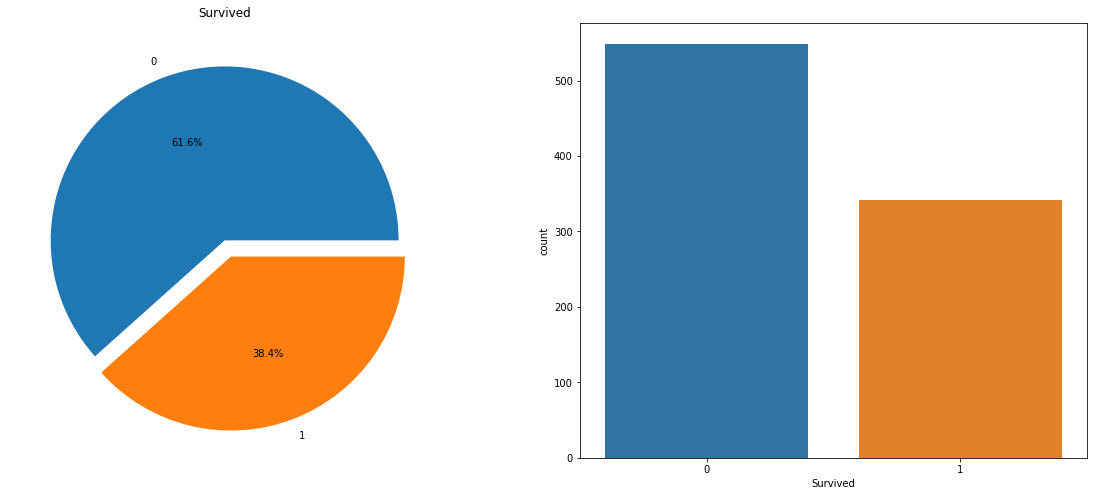

In [4]:
f, ax = plt.subplots(1, 2, figsize=(20,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
plt.show()

# 성별(Sex)에 따른 생존자(Survived) 확인
* 성별과 생존여부 사이의 관계를 확인하기 위한 목적이다.
* 성별에 따른 생존한 샘플과 사망한 샘플의 수를 각각 출력한다.
* 여자와 남자별 생존여부를 확인 결과,
    * 여자는 81명이 사망, 233명이 생존하였다.
    * 남자는 468명이 사망, 109명이 생존하였다.
* 즉, 성별(Sex) feature에서는 여자가 생존율이 높다.

In [5]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

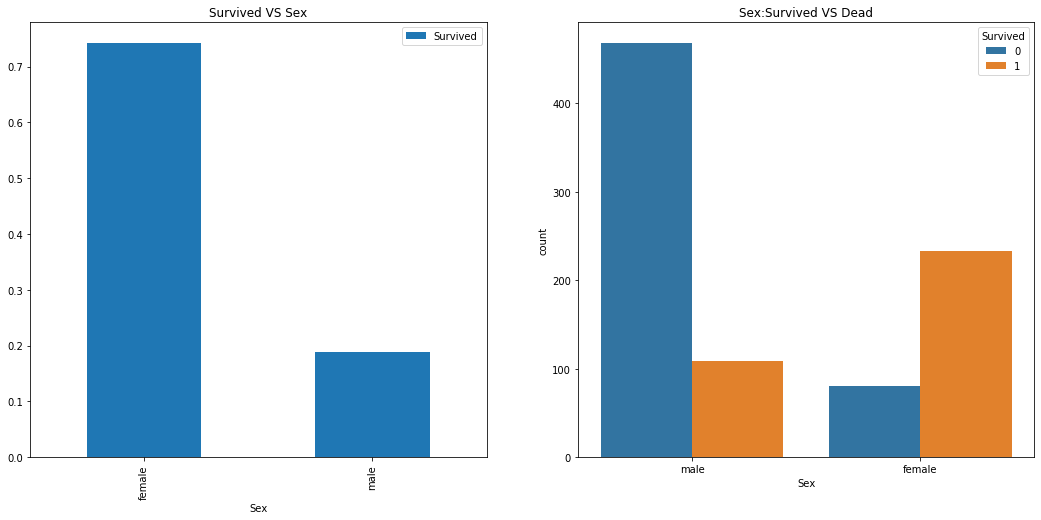

In [6]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived VS Dead')
plt.show()

# 객실등급(Pclass)에 따른 생존자 확인
* 객실등급과 생존여부 사이의 관계를 확인하기 위한 목적이다.
* 객실등급에 따른 생존한 샘플과 사망한 샘플의 수를 각각 출력한다.
* 등급별 생존여부를 확인 결과,
    * 1등급 객실의 샘플은 136명이 생존하였고, 80명이 사망하였다.
    * 2등급 객실의 샘플은 87명이 생존하였고, 97명이 사망하였다.
    * 3등급 객실의 샘플은 119명이 생존하였고, 372명이 사망하였다.
* 1등급, 2등급, 3등급 객실 순으로 생존율이 높다.
* 즉, 객실등급(Pclass) feature에서는 1등급 객실의 생존율이 높다.

In [7]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


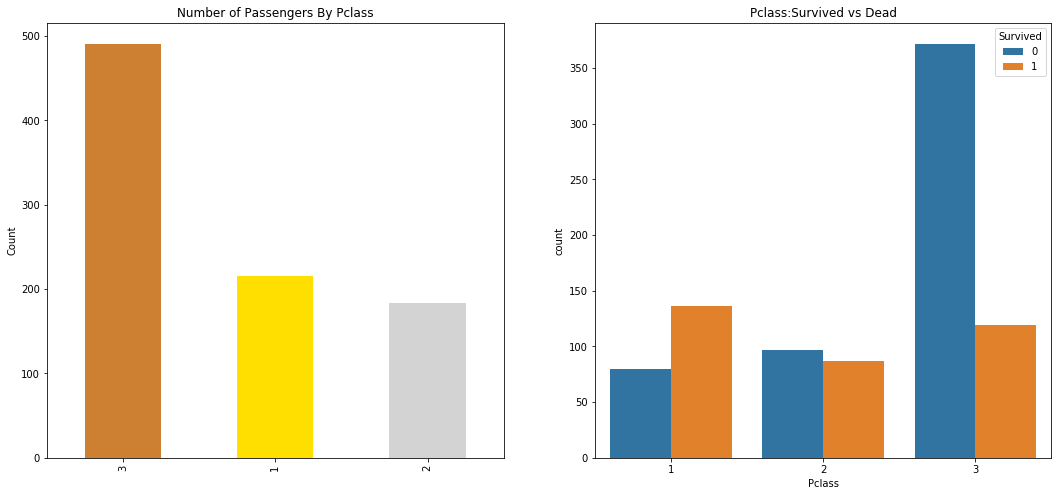

In [8]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

### 객실등급(Pclass)과 성별(Sex)에 따른 생존율

In [9]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

C:\Users\wer29\Anaconda3\envs\py\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


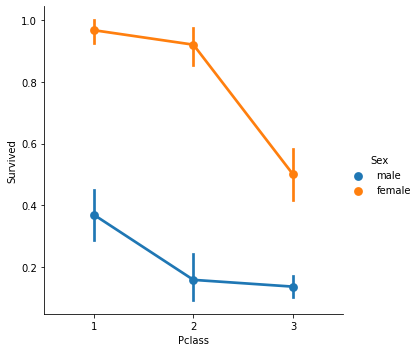

In [10]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)

# 나이(Age)에 따른 생존자 확인
* Age feature에 따르면,
     * 최고령자 승객의 나이는 80.0세이다.
     * 최연소자 승객의 나이는 0.42세이다.
     * 전체 승객의 평균 나이는 약 29.7세이다.
* 나이 feature는 상당수의 결측치인 177개 결측치를 가진다.

In [11]:
print('나이가 가장 많은 승객 :',data['Age'].max(),'Years')
print('나이가 가장 어린 승객 :',data['Age'].min(),'Years')
print('승객 평균 나이 :',data['Age'].mean(),'Years')

나이가 가장 많은 승객 : 80.0 Years
나이가 가장 어린 승객 : 0.42 Years
승객 평균 나이 : 29.69911764705882 Years


### 객실등급(Pclass)과 나이(Age), 성별(Sex)과 나이(Age)에 따른 생존율
* 먼저, 객실등급과 나이에 따른 생존율은,
    * 1등급 객실의 30-40대의 생존율이 가장 높다.
* 성별과 나이에 따른 생존율은,
    * 남자와 여자 모두 30대의 생존율이 가장 높다.

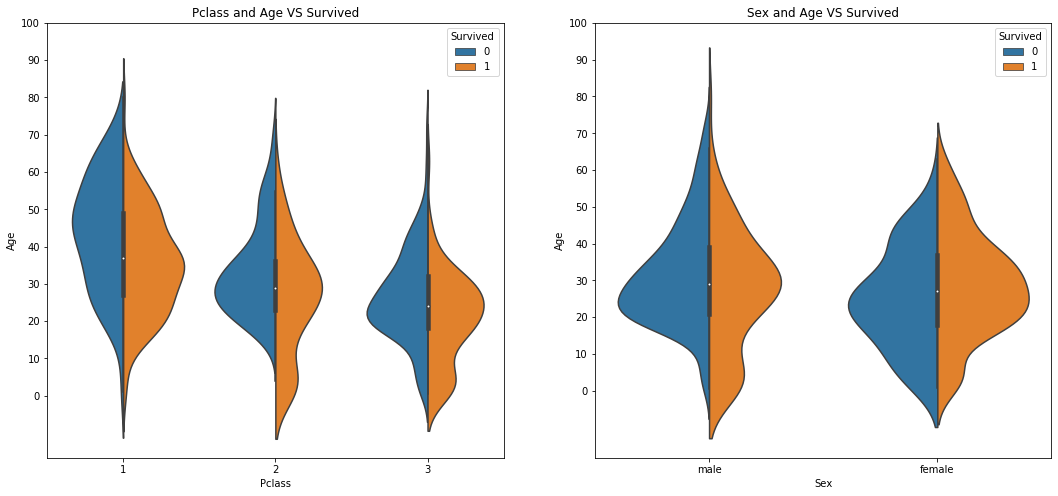

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### Age feature의 결측치 처리방법
Age의 결측값은 나이 평균으로 대체하기에는 무리가 있다. 승객들의 나이가 매우 다양하므로 이 값들의 평균으로 결측치를 처리하는 것은 적절치 않다.

따라서, Name 특성을 활용하여 나이대별 평균을 구한 뒤 결측치를 처리하는 것이 더 좋은 방법이다.

해외의 경우, Mr, Mrs, Miss 와 같은 호칭으로 나이를 범주화 할 수 있다. 그러나 데이터를 확인해보면 위와 같은 호칭 외에도, 오타나 같은 의미이지만 다르게 표현된 경우가 있기 때문에 그 값들 역시 올바른 호칭으로 처리해주어야 한다.

In [13]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
    
print('>> Initial :\n', data['Initial'])
print('\n>> Name :\n', data['Name'])

>> Initial :
 0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

>> Name :
 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


In [14]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
#print(data.Initial)
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9
